Se carga el dataset que se utilizara

In [1]:
from pandas import DataFrame
import pandas as pd

dataset =  DataFrame(pd.read_csv('calificaciones.csv', header=None))
dataset = dataset.drop(dataset.columns[[0]], axis=1)
dataset = dataset.drop(0)
dataset.columns = range(dataset.shape[1])
print(dataset.head)

<bound method NDFrame.head of                       0                  1                  2  \
1     100,70,70,79,90,0   0,85,82,79,80,89  70,89,78,90,78,78   
2     100,70,70,79,90,0   0,85,82,79,80,89  70,89,78,90,78,89   
3        0,78,80,0,90,0  70,79,78,90,82,76  78,79,90,87,88,82   
4     80,90,79,82,81,70  70,72,79,90,84,74  78,72,80,70,80,90   
5       0,70,0,80,70,70   82,80,90,92,90,0  70,70,80,80,82,80   
..                  ...                ...                ...   
386   95,80,70,76,94,93  85,84,83,72,78,75   96,79,0,77,90,79   
387   70,93,72,99,78,74  89,89,88,96,70,96  73,96,93,83,95,90   
388    75,96,88,78,0,90   0,95,73,88,89,78  95,74,81,83,83,90   
389  100,98,82,82,88,98  72,70,85,94,75,92   99,0,74,85,98,91   
390    0,94,71,92,70,86  99,95,79,84,73,80  83,92,90,81,80,91   

                      3                    4  
1     72,85,90,95,95,80  100,100,96,92,90,90  
2     72,85,90,95,95,80  100,100,96,92,90,95  
3     90,96,92,90,89,70    97,86,82,81,70,76  
4

Procesamiento de datos (Se saca el promedio de cada semestre y se guarda en una sola variable)

In [2]:
value = eval(dataset.loc[1, :][0])

aux = [0,0,0,0,0,0]
gradesAVGarray = []
        

for con in range(1, len(dataset) + 1):
    for con2 in range(0, 5):
        semestre = eval(dataset.loc[con, :][con2])
        grades = 0
        for con3 in range(0, len(semestre)):
            grades = grades + semestre[con3]
        #print(grades/len(semestre))
        aux[con2] = grades/len(semestre)
        grades = 0
    totalAvg = (aux[0] + aux[1] + aux[2] + aux[3] + aux[4])/5
    gradesAVGarray.append([aux[0], aux[1], aux[2], aux[3], aux[4], totalAvg])
    #print(aux)
print(gradesAVGarray)

[[68.16666666666667, 69.16666666666667, 80.5, 86.16666666666667, 94.66666666666667, 79.73333333333333], [68.16666666666667, 69.16666666666667, 82.33333333333333, 86.16666666666667, 95.5, 80.26666666666668], [41.333333333333336, 79.16666666666667, 84.0, 87.83333333333333, 82.0, 74.86666666666666], [80.33333333333333, 78.16666666666667, 78.33333333333333, 82.33333333333333, 80.0, 79.83333333333333], [48.333333333333336, 72.33333333333333, 77.0, 84.66666666666667, 81.5, 72.76666666666667], [81.66666666666667, 26.666666666666668, 81.0, 75.16666666666667, 91.16666666666667, 71.13333333333334], [81.83333333333333, 84.16666666666667, 86.5, 85.66666666666667, 52.5, 78.13333333333334], [85.33333333333333, 92.16666666666667, 80.16666666666667, 86.16666666666667, 81.66666666666667, 85.10000000000001], [88.0, 83.66666666666667, 47.0, 80.66666666666667, 40.0, 67.86666666666667], [79.33333333333333, 86.83333333333333, 96.83333333333333, 93.16666666666667, 87.66666666666667, 88.76666666666668], [60.0

Se transforma en una coleccion para el entrenamiento de la red y se normalizan los valores

In [3]:
from sklearn import preprocessing

datasetGradesAVG = pd.DataFrame(gradesAVGarray)
ddatasetGradesAVG = datasetGradesAVG.interpolate()
#print(datasetGradesAVG)

datasetnorm = preprocessing.minmax_scale(datasetGradesAVG, feature_range=(0, 1))
datasetnorm = DataFrame(datasetnorm)
print(datasetnorm)

            0         1         2         3         4         5
0    0.522310  0.628079  0.796258  0.838798  0.911111  0.759717
1    0.522310  0.628079  0.819127  0.838798  0.925000  0.773852
2    0.099738  0.775862  0.839917  0.866120  0.700000  0.630742
3    0.713911  0.761084  0.769231  0.775956  0.666667  0.762367
4    0.209974  0.674877  0.752599  0.814208  0.691667  0.575088
..        ...       ...       ...       ...       ...       ...
385  0.782152  0.780788  0.667360  0.592896  0.730556  0.710247
386  0.724409  0.906404  0.893971  0.942623  0.772222  0.958481
387  0.569554  0.647783  0.844075  0.147541  0.777778  0.537102
388  0.887139  0.807882  0.721414  0.838798  0.502778  0.785336
389  0.532808  0.862069  0.866944  0.765027  0.475000  0.714664

[390 rows x 6 columns]


Preparamos los datos para alimentar la red para entrenamiento y prueba.

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

zy = datasetnorm.iloc[:, -1:]
zx = datasetnorm.iloc[:, :-1].values
X = np.array(zx, dtype='float64')
y = np.array(zy, dtype='float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=20)
print (X_train.shape, y_train.shape)

(273, 5) (273, 1)


Se define nuestro modelo, con un numero de "vecinos" deseados a utilizarse, y se entrena

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Realizamos predicción de valores de prueba, y comparamos con valores reales utilizando el error cuadratico medio.

In [6]:
from sklearn.metrics import mean_squared_error

pred = knn.predict(X_test)
MSE = mean_squared_error(y_test, pred)

print ('MSE '+ str(MSE))

MSE 0.006134983168101903


Se imprime grafica

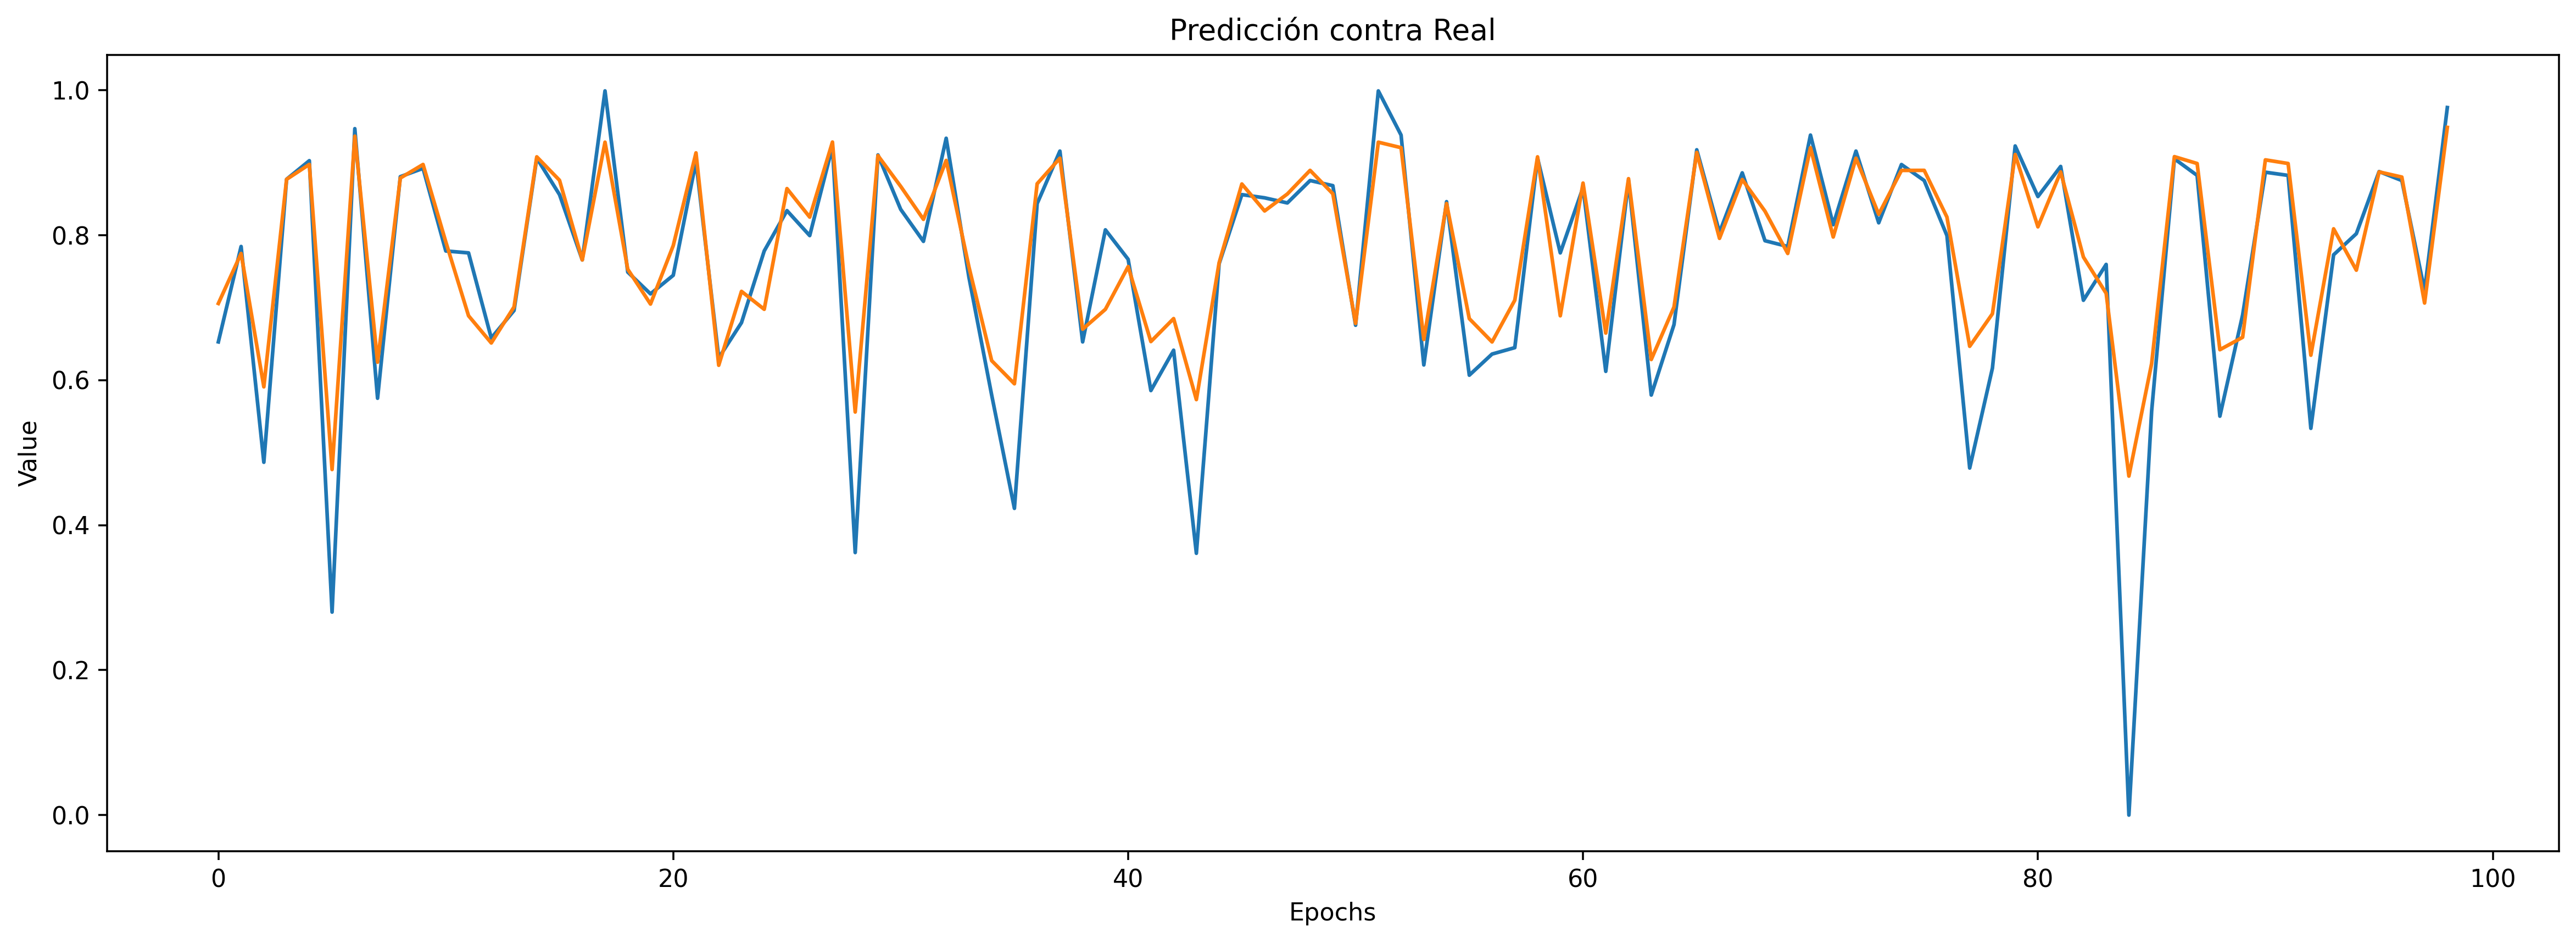

[[0.71033569]
 [0.70583039]
 [0.77482332]
 [0.59081272]
 [0.87712014]
 [0.89770318]
 [0.47676678]
 [0.93666078]
 [0.62482332]
 [0.87888693]
 [0.89761484]
 [0.79081272]
 [0.68886926]
 [0.65132509]
 [0.70106007]
 [0.90812721]
 [0.87579505]
 [0.76590106]
 [0.92835689]
 [0.75309187]
 [0.70503534]
 [0.78568905]
 [0.91360424]
 [0.62058304]
 [0.7225265 ]
 [0.69779152]
 [0.86431095]
 [0.825     ]
 [0.92853357]
 [0.55609541]
 [0.90980565]
 [0.86740283]
 [0.82190813]
 [0.90318021]
 [0.75636042]
 [0.62694346]
 [0.595053  ]
 [0.87102473]
 [0.90627208]
 [0.67031802]
 [0.69779152]
 [0.75671378]
 [0.65326855]
 [0.68498233]
 [0.57323322]
 [0.76201413]
 [0.87067138]
 [0.83348057]
 [0.85689046]
 [0.88948763]
 [0.85715548]
 [0.67835689]
 [0.92835689]
 [0.92075972]
 [0.65618375]
 [0.84372792]
 [0.68489399]
 [0.65273852]
 [0.71033569]
 [0.90812721]
 [0.68886926]
 [0.87190813]
 [0.66501767]
 [0.87800353]
 [0.62853357]
 [0.70097173]
 [0.91422261]
 [0.79567138]
 [0.87685512]
 [0.83312721]
 [0.77482332]
 [0.92

In [8]:
from matplotlib import pyplot

pyplot.figure(num=None, figsize=(18, 6), dpi=320, facecolor='w', edgecolor='k')
pyplot.plot(y_test[1:100,]) #Valores ajustables para grafica
pyplot.plot(pred[1:100,])
pyplot.xlabel('Epochs')
pyplot.ylabel('Value')
pyplot.title('Predicción contra Real')
pyplot.show()


print(pred)


En este paso, realizaremos entrenamiento con multiples valores de vecinos, para buscar un parametro de vecinos que nos de resultado con mejor aptitud.